#House Price Prediction

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,r2_score, mean_squared_error, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")


In [6]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
x = df[['rm', 'lstat', 'ptratio']]
y = df['medv']


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [12]:
y_pred = model.predict(x_test)

Model Performance

In [14]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("r2 score:", r2)
print("RMSE:", rmse)

r2 score: 0.6302528487272827
RMSE: 5.207202455789536


This is a moderate to good fit r2 and predictions are off by ~5.2 units rmse

##See the Prediction Formula

In [15]:
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)


Intercept: 14.58809926157104
Coefficient: [ 4.93311836 -0.56712588 -0.86709475]


best price is 1450


Predict House Price for a New House

In [18]:
new_house = [[6, 12,18]]
predicted_price = model.predict(new_house)
print("predicted price:", predicted_price[0])

predicted price: 21.77359324200277


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


This model learns:

More rooms → higher price

Higher poverty → lower price

Higher PTRATIO → lower price

#compare Logistic Regression vs Decision Tree

Create Binary Target (High Price or Not)

In [19]:
df['price_category'] = np.where(df['medv']>=df['medv'].median(),1,0)

In [20]:
x = df[['rm', 'lstat','ptratio']]
y = df['price_category']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

Train Logistic Regression

In [23]:
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

LogisticRegression()

In [26]:
log_pred = log_model.predict(x_test)

Train Decision Tree

In [27]:
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)
tree_pred = log_model.predict(x_test)

compare Accuracy

In [28]:
print("Logistic Regression:", accuracy_score(y_test, log_pred))

Logistic Regression: 0.8333333333333334


In [29]:
print("Decision Tree:", accuracy_score(y_test, tree_pred))

Decision Tree: 0.8333333333333334


The model has an accuracy of 83.33%, meaning it makes correct predictions for roughly 8 out of 10 observations.

Compare Confusion Matrices

In [30]:
print("Confusion Matrix for logistic regression")
print(confusion_matrix(y_test, log_pred))
print("Confusion matrix for decision tree")
print(confusion_matrix(y_test, tree_pred))

Confusion Matrix for logistic regression
[[50  8]
 [ 9 35]]
Confusion matrix for decision tree
[[50  8]
 [ 9 35]]


##ROC – AUC Comparison

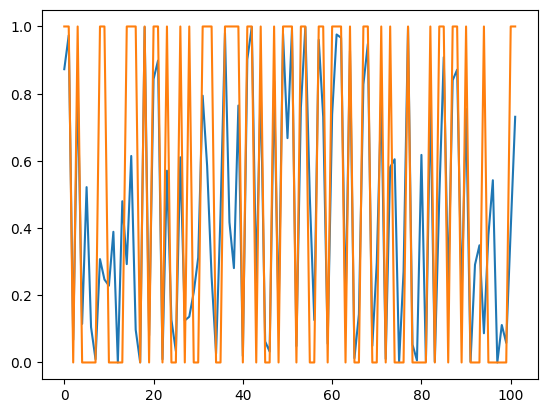

In [35]:
log_probs = log_model.predict_proba(x_test)[:,1]
tree_probs = tree_model.predict_proba(x_test)[:,1]
plt.plot(log_probs)
plt.plot(tree_probs)

AUC

In [32]:
print("Logistic AUC:", roc_auc_score(y_test, log_probs))
print("Decision AUC:", roc_auc_score(y_test, tree_probs))

Logistic AUC: 0.9318181818181819
Decision AUC: 0.8283699059561129


ROC

In [33]:
log_fpr, log_tpr, _ = roc_curve(y_test, log_probs)
tree_fpr, tree_tpr, _ = roc_curve(y_test, tree_probs)

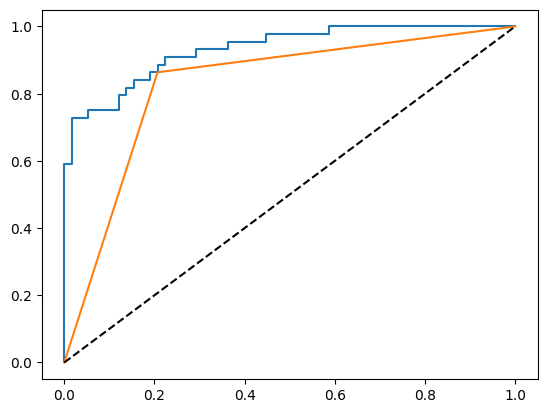

In [34]:
plt.plot(log_fpr, log_tpr)
plt.plot(tree_fpr, tree_tpr)
plt.plot([0,1],[0,1], 'k--')

###Feature Importance

Logistic Regression

In [38]:
importance = pd.DataFrame({
    "Feature":x.columns,
    "Coefficient": log_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
importance

,Feature,Coefficient
0,rm,1.220787
1,lstat,-0.298590
2,ptratio,-0.379458


Decision Tree

In [40]:
tree_importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': tree_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
tree_importance

,Feature,Importance
1,lstat,0.651634
0,rm,0.236410
2,ptratio,0.111956


##Random Forest (Power Model)

In [41]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf.pred = rf.predict(x_test)

In [42]:
rf_probs = rf.predict_proba(x_test)[:,1]

Compare Accuracy

compare AUC AND ROC

In [43]:
print("RF AUC:", roc_auc_score(y_test,rf_probs))

RF AUC: 0.924960815047022


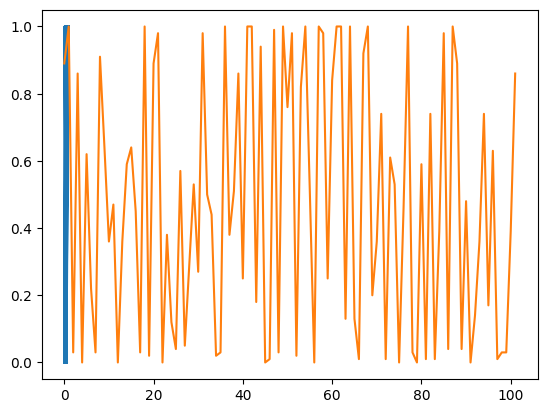

In [48]:
plt.plot(log_probs, tree_probs, rf_probs)